# One hot encoding pros and cons

* Categorical features can be either nominal features or ordinal features. We perform one hot encoding for nominal type categorical variables.Ex: gender

* With one hot encoding, the number of columns/features will increase by the unique categories in a feature. Suppose gender feature contains two unique values, then we will have two new features(columns)

* One hot encoding is also referred to as dummy encoding, though we usually drop first or last column after expanding in dummy encoding.

* One hot encoding can be used when the number of unique values in the categorical feature is small and is well known and fixed.
* But with high cardinality categorical(nominal) features, we end up adding a lot of new features that could lead to overfitting(curse of dimensionality)

* With one hot encoding, tree based models perform poorly compared to linear models. With high cardinality categorical features, the number of training instances associated with each category could be less, therefore the tree based algorithms might not consider these sparse features for split(will result in less information gain compared to other features).So many of the features after encoding could be assigned low feature importances.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("datasets/income_evaluation.csv")
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [3]:
df.columns = [col.strip() for col in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].nunique()}")

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native-country: 42
income: 2


In [6]:
# for simplicity I will take only marital-status and occupation under nominal variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
for col in X.columns:
    if df[col].dtype == "object" and col not in ["marital-status", "occupation"]:
        X.drop(columns=col, inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   capital-gain    32561 non-null  int64 
 6   capital-loss    32561 non-null  int64 
 7   hours-per-week  32561 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.0+ MB


In [7]:
X.loc[:, ["marital-status", "occupation"]] = X.loc[:, ["marital-status", "occupation"]].apply(
    lambda series: series.str.strip()
)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_trans = label_enc.fit_transform(y)
np.unique(y_trans)

array([0, 1])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

col_transformer = ColumnTransformer(
    [
        ("one_hot_enc", OneHotEncoder(sparse=False), ["marital-status", "occupation"]),
        ("drop_columns", "drop", ["marital-status", "occupation"]),
    ],
    remainder="passthrough",
)

X_trans = col_transformer.fit_transform(X)
X_trans.shape

(32561, 28)

In [11]:
col_transformer.named_transformers_["one_hot_enc"].categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object)]

In [12]:
col_transformer.get_feature_names()

['one_hot_enc__x0_Divorced',
 'one_hot_enc__x0_Married-AF-spouse',
 'one_hot_enc__x0_Married-civ-spouse',
 'one_hot_enc__x0_Married-spouse-absent',
 'one_hot_enc__x0_Never-married',
 'one_hot_enc__x0_Separated',
 'one_hot_enc__x0_Widowed',
 'one_hot_enc__x1_?',
 'one_hot_enc__x1_Adm-clerical',
 'one_hot_enc__x1_Armed-Forces',
 'one_hot_enc__x1_Craft-repair',
 'one_hot_enc__x1_Exec-managerial',
 'one_hot_enc__x1_Farming-fishing',
 'one_hot_enc__x1_Handlers-cleaners',
 'one_hot_enc__x1_Machine-op-inspct',
 'one_hot_enc__x1_Other-service',
 'one_hot_enc__x1_Priv-house-serv',
 'one_hot_enc__x1_Prof-specialty',
 'one_hot_enc__x1_Protective-serv',
 'one_hot_enc__x1_Sales',
 'one_hot_enc__x1_Tech-support',
 'one_hot_enc__x1_Transport-moving',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(X_trans, y_trans)

RandomForestClassifier(n_estimators=500, random_state=42)

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=rf_clf.feature_importances_, y=col_transformer.get_feature_names(), ax=ax)

<AxesSubplot:>

We could see that many of the one hot encoded features have low feature importance

In [25]:
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

col_transformer2 = ColumnTransformer(
    [
        ("target_enc", TargetEncoder(), ["marital-status", "occupation"]),
        ("drop_columns", "drop", ["marital-status", "occupation"]),
    ],
    remainder="passthrough",
)

X_trans = col_transformer2.fit_transform(X, y_trans)
X_trans.shape

/media/girish/HDD/code_repos/bitbucket/repos/machine_learning/.venv/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(32561, 8)

In [26]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(X_trans, y_trans)

RandomForestClassifier(n_estimators=500, random_state=42)

<AxesSubplot:>

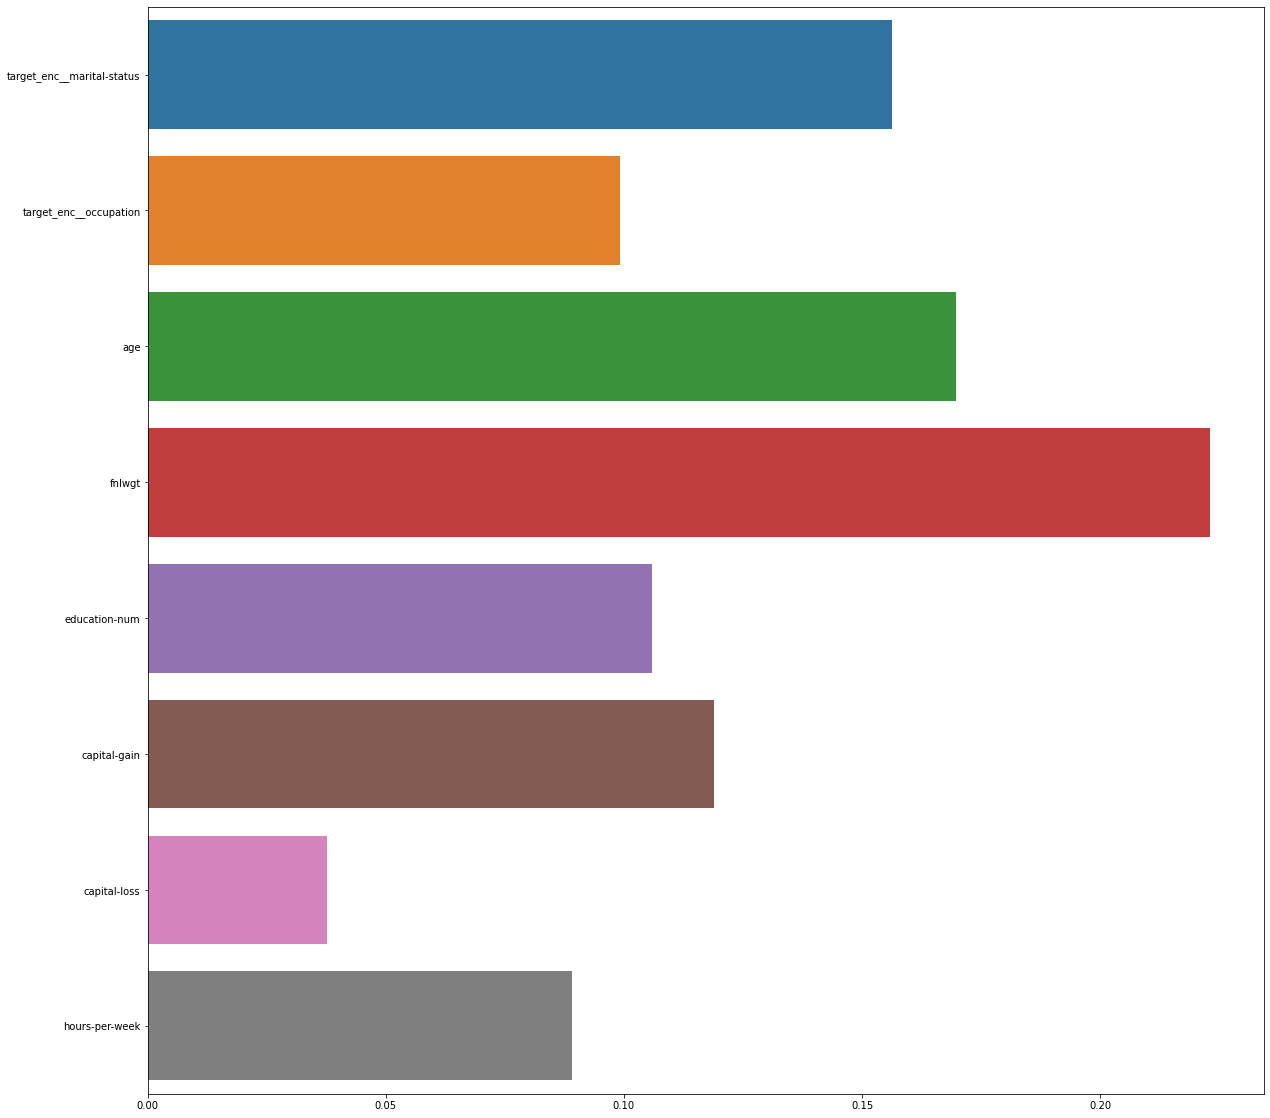

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=rf_clf.feature_importances_, y=col_transformer2.get_feature_names(), ax=ax)

With target encoding, the two nominal features have better feature importance

## Dummy variable trap

Consider the following regression problem of predicting cost of feeding a pet. Dataset `$10` to feed cats, `$15` to feed dogs, `$5` to feed snakes, and `$8` to feed rabbits.
<br>

We could form a linear relationship

```text
# after one hot encoding. Hence 4 features each for a pet category
y = 10 * cat + 15 * dog + 5 * snakes + 8 * rabbits
```

<br>
If we introduce a bias term in the linear relationship, we could have numerous combinations of coefficients that would approximate the given dataset. Thus we lose the uniqueness of coefficients of features.

```text
# this would work
y = 4 + 6 * cat + 11 * dog + 1 * snakes + 4 * rabbits

# this would work too
y = 4 + 6 * cat + 11 * dog + 1 * snakes + 4 * rabbits
```

In the above equation, by changing the intercept/bias, we could endup with different values for the coefficients. Thus when we lose the uniqueness of coefficients and its interpretability. This is referred to as dummy variable trap.

<br>
But if we drop one of the category columns from one hot encoding (dummy encoding), say for instance the cat feature, this would force the bias to be fixed and the rest of the coefficients would also get fixed as well. Here the bias term gets fixed because in the absence of all other features(cat=1), then the model should be able to predict for the cost for cat. Thus bias term is now responsible for predicting for cat species.

```text
y = 10 + 5 * dog + (-5) * snakes + (-2) * rabbits
# other linear combinations would not approximate well for cat
```

From the above linear relationship, we could interpret the coefficients as expenditure relative to the cat. Thus coefficients are interpretable with dummy encoding.

<br>

### Cons

* Though dropping a feature after onehot encoding gives uniqueness and interpretability to the linear relationship, the bias term escapes regularization. Due to this we could overfit predicting values.


### Recommendation

* Use one hot encoding when the nominal feature cardinality is <= 5.
* By grouping related values, we could reduce the cardinality of the feature and that could help applying one hot encoding on the group.
* Don't drop a column while training ML models. Drop only when doing a statistical analysis.Basically consider dummy variable trap only when performing statistical analysis.

### References

* [One hot encoding](https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html)

## One hot encoding and tree based algorithms

> One-hot encoding categorical variables with high cardinality can cause inefficiency in tree-based ensembles. Continuous variables will be given more importance than the dummy variables by the algorithm which will obscure the order of feature importance resulting in poorer performance. - [One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)